In [1]:
# Load the Drive helper and mount
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2 
import random
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.layers.core import Dropout
from keras.callbacks import EarlyStopping

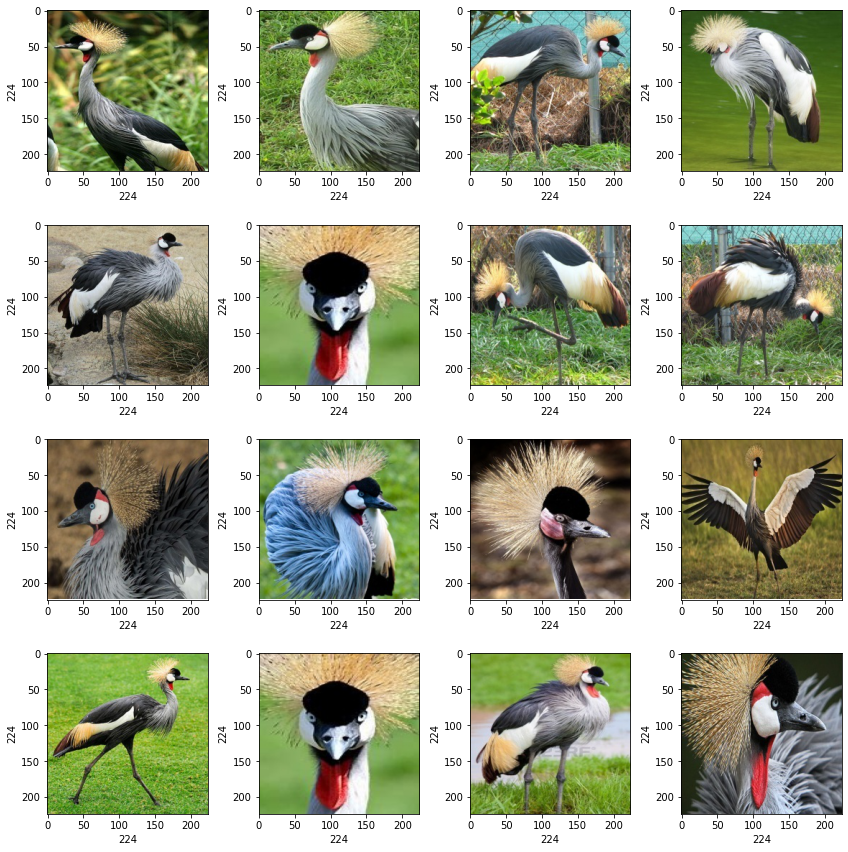

In [3]:
# Visualize some of the images 

# AFRICAN CROWNED CRANE
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Bird_Species_Prediction/Data/AFRICAN CROWNED CRANE"
for i in range(1, 17):
  plt.subplot(4, 4, i)
  plt.tight_layout()
  rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)
  plt.ylabel(rand_img.shape[0], fontsize = 10)

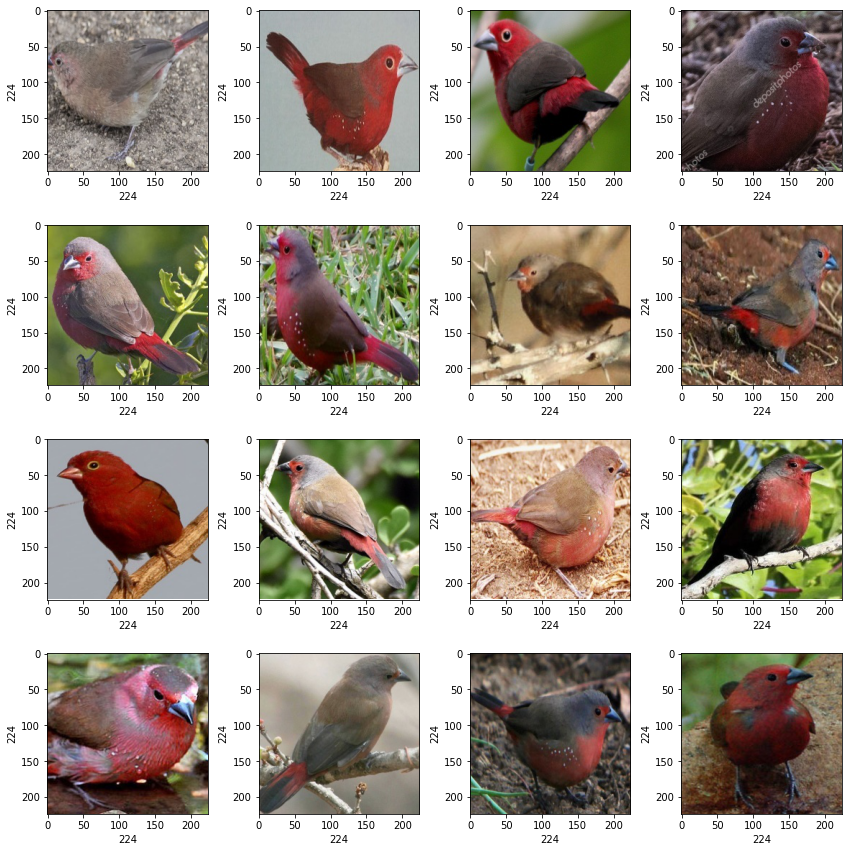

In [4]:
# AFRICAN FIREFINCH
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Bird_Species_Prediction/Data/AFRICAN FIREFINCH"
for i in range(1, 17):
  plt.subplot(4, 4, i)
  plt.tight_layout()
  rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)
  plt.ylabel(rand_img.shape[0], fontsize = 10)

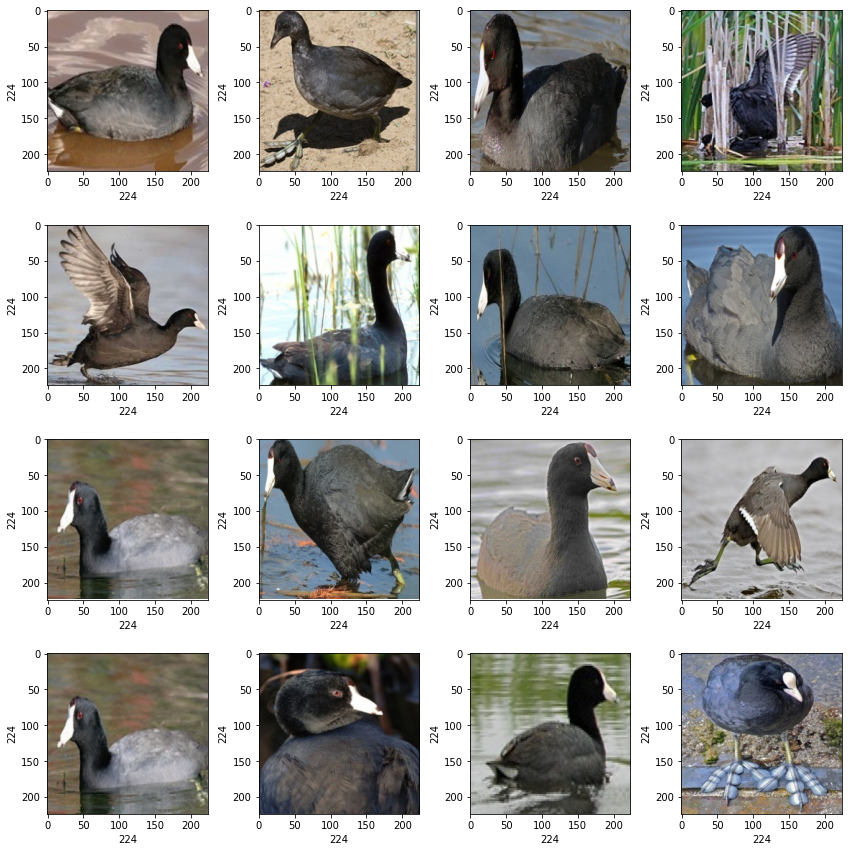

In [5]:
# AMERICAN COOT
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Bird_Species_Prediction/Data/AMERICAN COOT"
for i in range(1, 17):
  plt.subplot(4, 4, i)
  plt.tight_layout()
  rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)
  plt.ylabel(rand_img.shape[0], fontsize = 10)

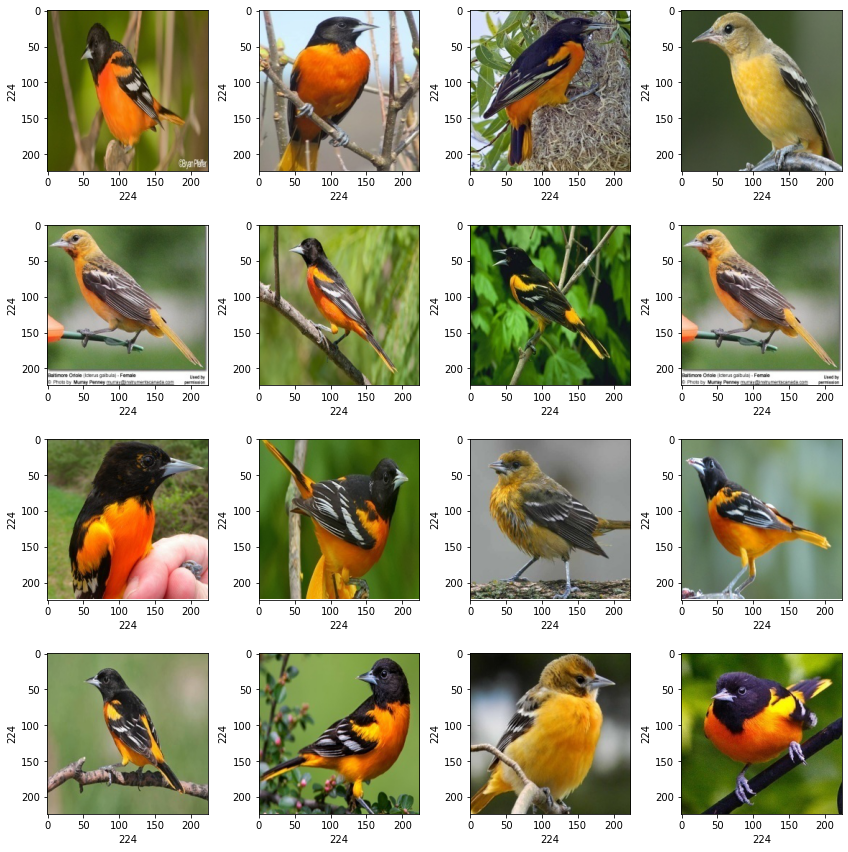

In [6]:
# BALTIMORE ORIOLE
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Bird_Species_Prediction/Data/BALTIMORE ORIOLE"
for i in range(1, 17):
  plt.subplot(4, 4, i)
  plt.tight_layout()
  rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)
  plt.ylabel(rand_img.shape[0], fontsize = 10)

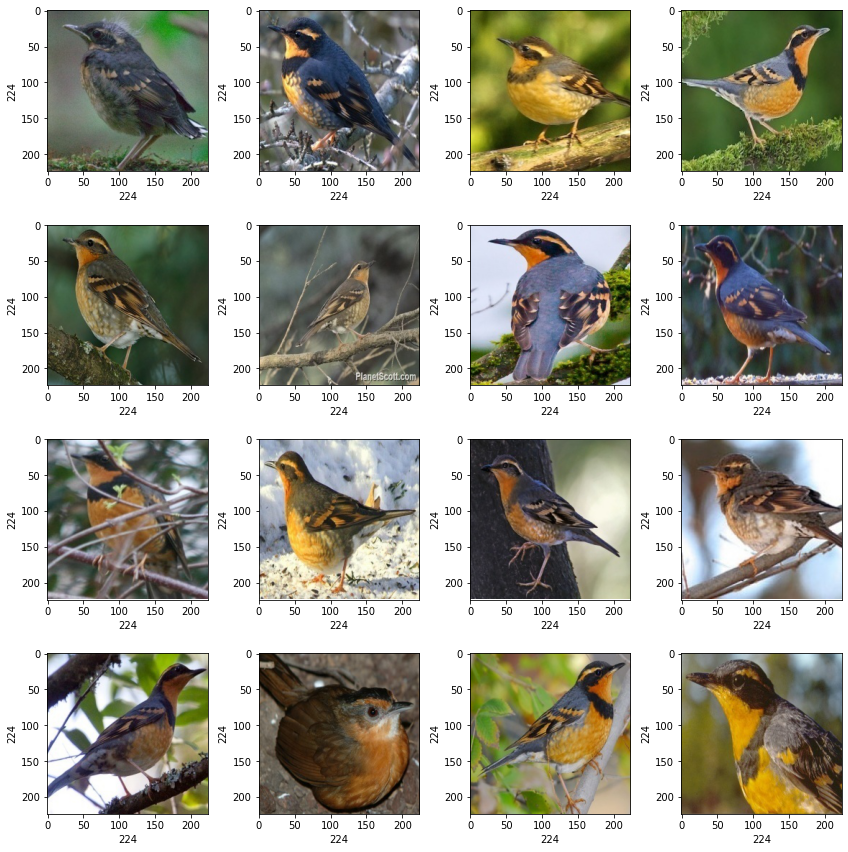

In [7]:
# VARIED THRUSH
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Bird_Species_Prediction/Data/VARIED THRUSH"
for i in range(1, 17):
  plt.subplot(4, 4, i)
  plt.tight_layout()
  rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)
  plt.ylabel(rand_img.shape[0], fontsize = 10)

In [8]:
# Set root directory and create 2 empty lists for image and labels
dir = "/content/drive/MyDrive/Bird_Species_Prediction/Data"
root_dir = listdir(dir)
image_list, label_list = [], []

In [9]:
# Reading and converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [10]:
# Check for class imbalance
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

VARIED THRUSH            193
AMERICAN COOT            158
AFRICAN FIREFINCH        140
BALTIMORE ORIOLE         137
AFRICAN CROWNED CRANE    137
dtype: int64

In [11]:
# Check the number of classes we are using
num_classes = len(label_counts)
num_classes

5

In [12]:
# Check the size of each image
image_list[0].shape

(224, 224, 3)

In [13]:
# Check shape of image labels
label_list = np.array(label_list)
label_list.shape

(765,)

In [14]:
# Split data into 80% training data and 20% test data
X_train, x_test, Y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 0)

In [15]:
# Normalize the images
X_train = np.array(X_train, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0
X_train = X_train.reshape(-1, 224, 224, 3)
x_test = x_test.reshape(-1, 224, 224, 3)

In [16]:
# One-hot encoding
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['AFRICAN CROWNED CRANE' 'AFRICAN FIREFINCH' 'AMERICAN COOT'
 'BALTIMORE ORIOLE' 'VARIED THRUSH']


In [17]:
# Split data into 80% training set and 20% validation set
X_train, x_val, Y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.2)

In [18]:
EarlyStopping(monitor='val_err', patience=5)
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same", input_shape=(224, 224, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 21904)             0         
                                                                 
 dense (Dense)               (None, 32)                7

In [19]:
es = EarlyStopping(monitor='val_loss', patience=5)
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005), metrics=['accuracy'])

In [20]:
# Time to train the model!
epochs = 50
batch_size = 128
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val), callbacks=[es])

Epoch 1/50
4/4 [==============================] - 10s 2s/step - loss: 1.6713 - accuracy: 0.2474 - val_loss: 1.5120 - val_accuracy: 0.3496
Epoch 2/50
4/4 [==============================] - 9s 2s/step - loss: 1.4789 - accuracy: 0.3211 - val_loss: 1.4711 - val_accuracy: 0.3659
Epoch 3/50
4/4 [==============================] - 9s 2s/step - loss: 1.3730 - accuracy: 0.4785 - val_loss: 1.3327 - val_accuracy: 0.4228
Epoch 4/50
4/4 [==============================] - 9s 2s/step - loss: 1.2958 - accuracy: 0.4703 - val_loss: 1.2936 - val_accuracy: 0.3984
Epoch 5/50
4/4 [==============================] - 9s 2s/step - loss: 1.1970 - accuracy: 0.5562 - val_loss: 1.2112 - val_accuracy: 0.5203
Epoch 6/50
4/4 [==============================] - 9s 2s/step - loss: 1.1216 - accuracy: 0.6360 - val_loss: 1.1778 - val_accuracy: 0.5285
Epoch 7/50
4/4 [==============================] - 9s 2s/step - loss: 1.0463 - accuracy: 0.6544 - val_loss: 1.0934 - val_accuracy: 0.5772
Epoch 8/50
4/4 [========================

In [21]:
# Save the model in h5 format
model.save("/content/drive/MyDrive/Bird_Species_Prediction")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bird_Species_Prediction/assets


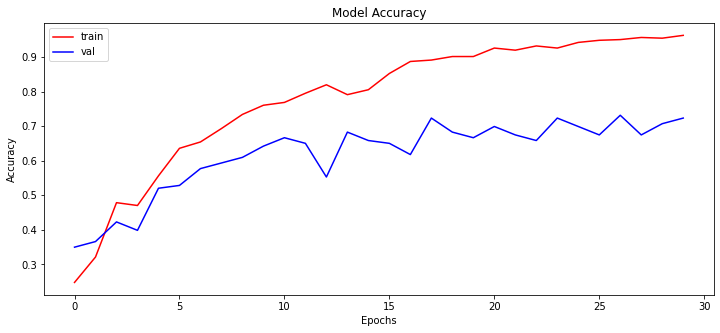

In [22]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history["accuracy"], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

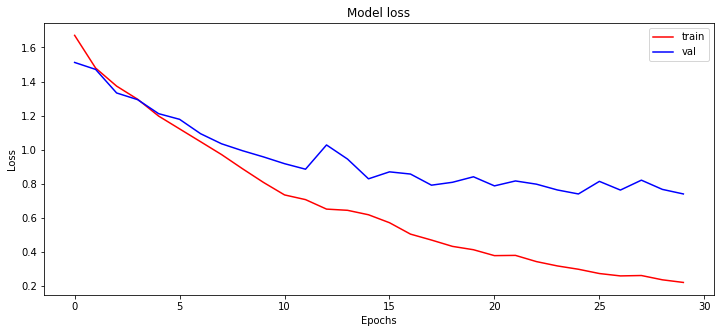

In [23]:
# Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [24]:
# Calculate test accuracy
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

5/5 [==============================] - 1s 217ms/step - loss: 0.6354 - accuracy: 0.7712
Test Accuracy: 77.1241843700409


In [25]:
# Storing predictions
y_pred = model.predict(x_test)

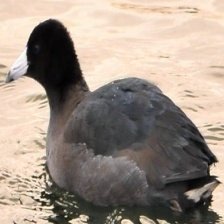

In [26]:
# Pick a random image for prediction
img = array_to_img(x_test[5])
img

In [27]:
labels = lb.classes_
print(labels)
print("Originally : ", labels[np.argmax(y_test[5])])
print("Predicted : ", labels[np.argmax(y_pred[5])])

['AFRICAN CROWNED CRANE' 'AFRICAN FIREFINCH' 'AMERICAN COOT'
 'BALTIMORE ORIOLE' 'VARIED THRUSH']
Originally :  AMERICAN COOT
Predicted :  AMERICAN COOT
